# Titanic Classification

Developing a Machine learning Model that predicts the survival of passengers in titanic based on their personal data...

Algorithms used are:

1.Logistic Regression Classifier

2.Random Forest Classifier

3.K Neighbours Classifier

4.Gradient Boosting Classifier

5.Decision Tree Classifier

Finally a predicted data file is created that contains predictions made by the model with passengerid and survived columns

# Importing Libraries

In [114]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [115]:
#loading the  Titanic Dataset
titanic = pd.read_csv(r'C:\Users\srira\OneDrive\Desktop\BHARAT INTERN\Titanic-Dataset.csv',encoding='latin1')

In [116]:
#reading first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
#featuring the info of data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [118]:
#shape of titanic dataset
titanic.shape

(891, 12)

In [119]:
#reading columns names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Info about Columns:

1. PassengerId: unique id to each passenger
2. Survived: whether the passenger survived (1) or not (0)
3. Pclass(Passenger Class): Ticket class (1st, 2nd, or 3rd)
4. Name: name of passenger
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses aboard
8. Parch: number of parents/children aboard
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: Cabin number
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [120]:
# data types of columns
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [121]:
#reading survived columns values
# 0-died
# 1-survived
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

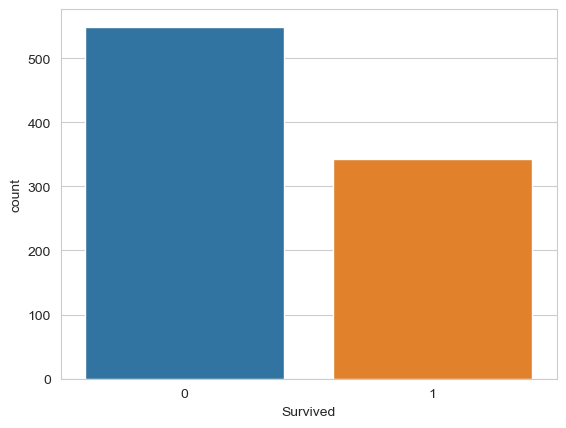

In [122]:
#visualising plot for survived
sns.countplot(x=titanic['Survived'])
plt.show()

survived count is lesser than not survived

# Data Preprocessing

In [123]:
#checking for duplicated values
titanic.duplicated().sum()

0

Manipluating Null values

In [124]:
#checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

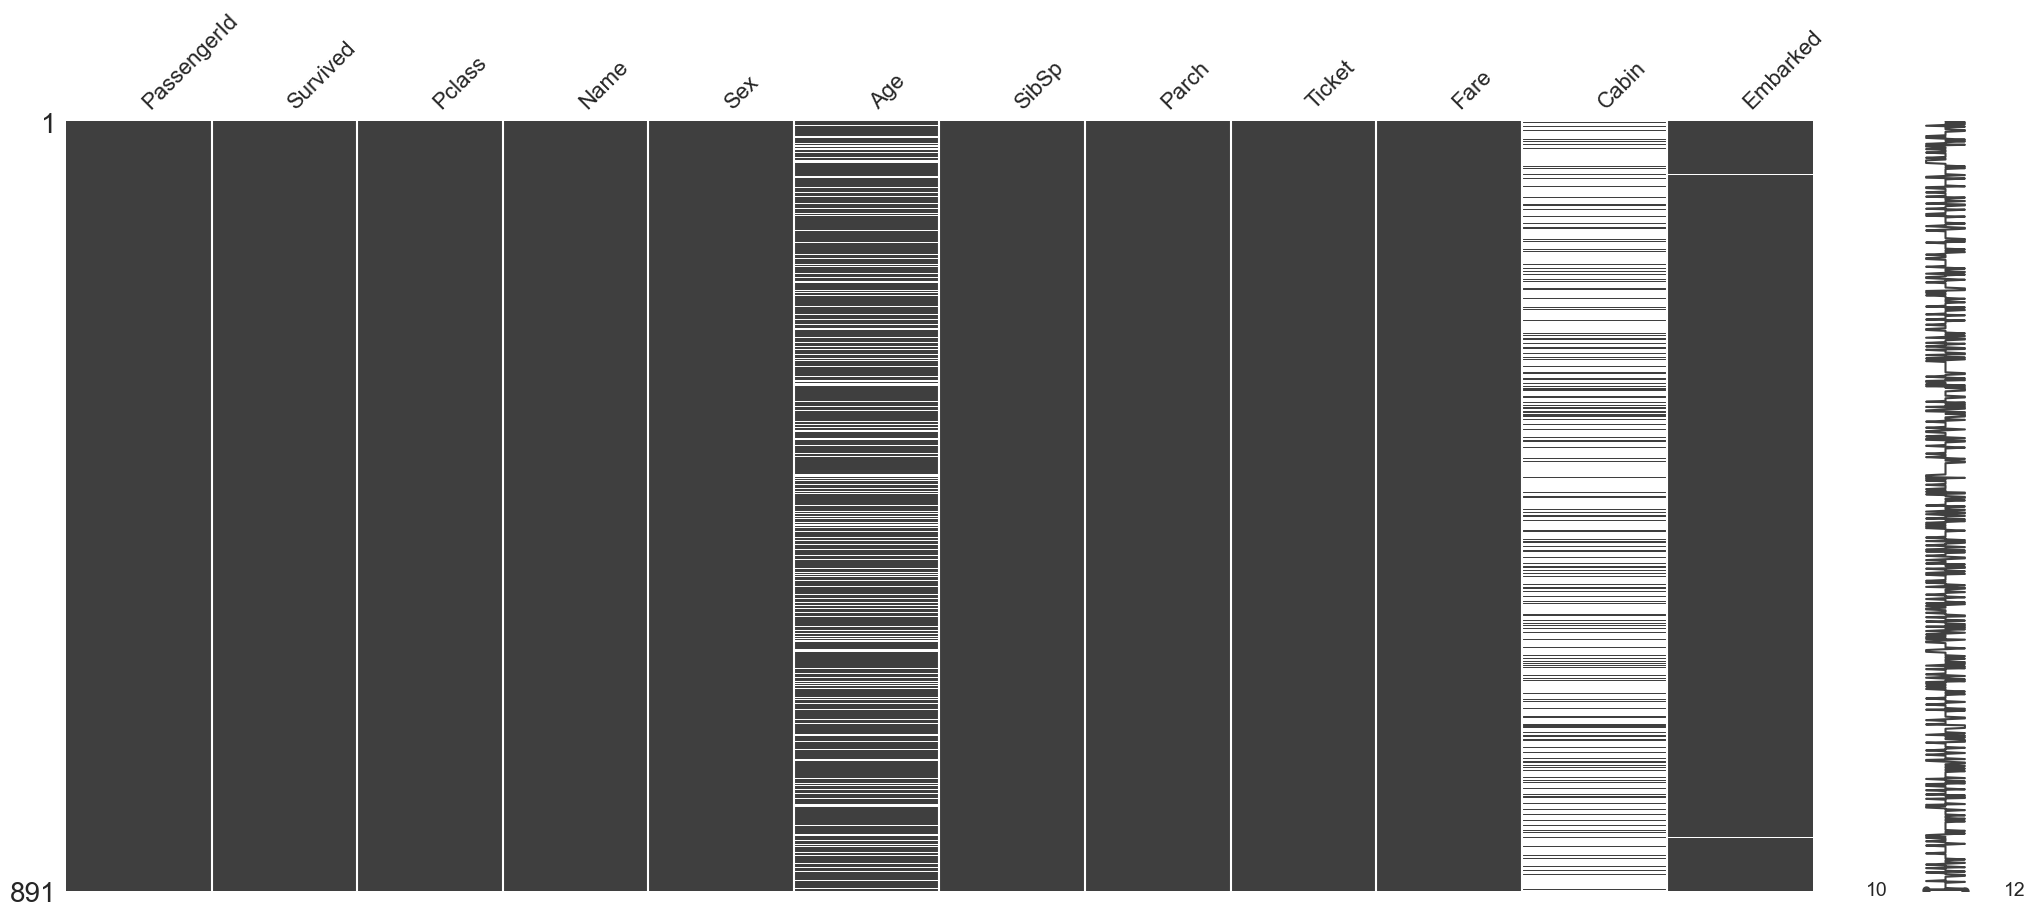

In [125]:
#visualising missing data
missingno.matrix(titanic)

whitelines in above visualisation represents missing data

In [126]:
# Checking what percentage column contain missing values
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [127]:
#since cabin column contains more missing data (>75%), better to drop it
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)

In [128]:
#imputing the null values in age column using simple imputer
imputer = SimpleImputer(strategy='mean')
titanic['Age']=imputer.fit_transform(titanic[['Age']])

In [129]:
#imputing the null values in embarked column using fillna
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [130]:
#now checking for is there any null values
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

no null values present after manipluating them

In [131]:
#Finding no. of unique values in each column of dataset
titanic.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [132]:
#dropping unneccessary columns since they dont have any impact in model building
titanic.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [133]:
#info after dropping uncessary columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [134]:
#dataset after dropping uncessary columns
titanic.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.000000,0,0,13.00,S
887,888,1,1,female,19.000000,0,0,30.00,S
888,889,0,3,female,29.699118,1,2,23.45,S
889,890,1,1,male,26.000000,0,0,30.00,C
890,891,0,3,male,32.000000,0,0,7.75,Q


In [135]:
#showing info. about numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
#showing info. about categorical columns
titanic.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# Visualising the data for better interpretation

Below Visualisations demonistrate the individvual counts first and then later they are analysed with target variable Survived.

Sex
male      577
female    314
Name: count, dtype: int64

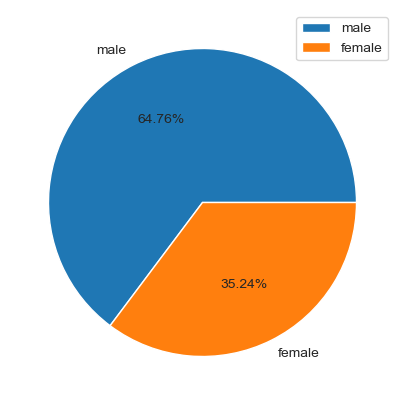

In [137]:
#value count of male and female
data=titanic['Sex'].value_counts()
display(data)

#visualising their percentage
plt.figure(figsize=(5,5))
plt.pie(data.values,labels=data.index,autopct='%.2f%%')
plt.legend()
plt.show()

More male percentage then females

<Axes: xlabel='Sex', ylabel='Survived'>

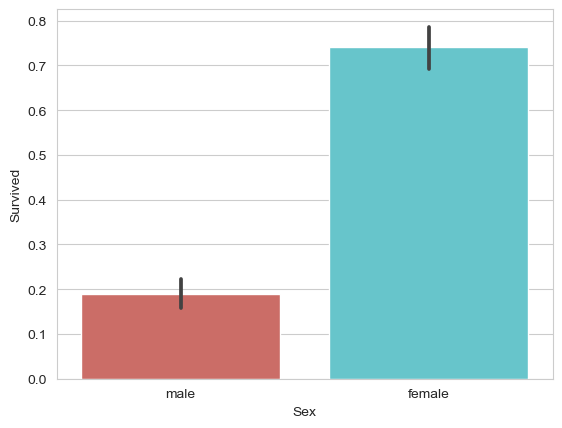

In [138]:
#visualising all columns over survived column to identify best features for modelling

#Visualising Distribution of Sex Column Survived Wise
sns.barplot(x="Sex", y="Survived", data=titanic, palette="hls")

Females survived more than males

<Axes: xlabel='Pclass', ylabel='count'>

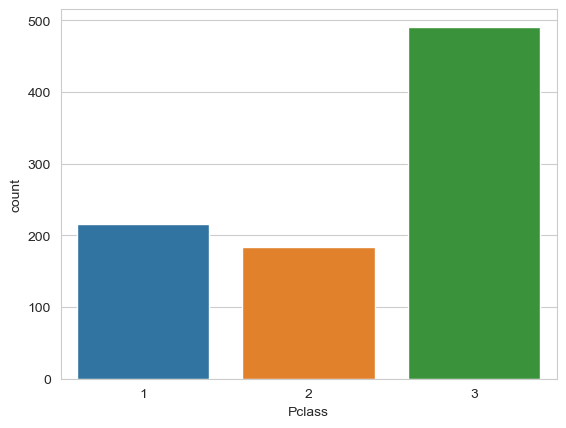

In [139]:
#plotting the pclass for better understanding
sns.countplot(x='Pclass',data=titanic)

More passengers are at Pclass3 followed by Pclass1

<Axes: xlabel='Survived', ylabel='count'>

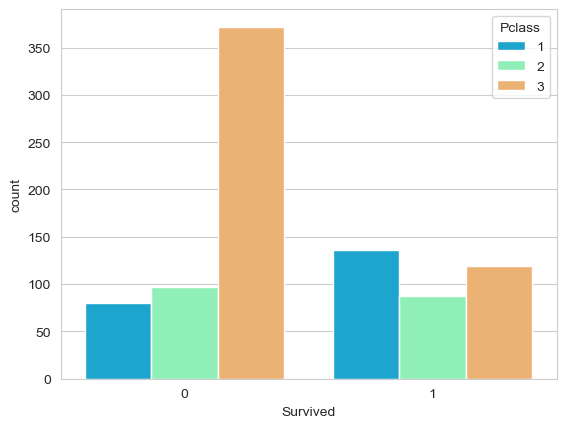

In [140]:
#looking at pclass by survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

Passengers at pclass3 survived the least

<Axes: xlabel='SibSp', ylabel='count'>

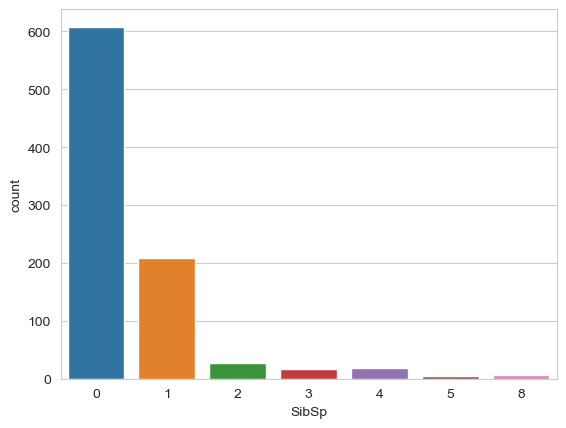

In [141]:
#plotting the SibSp for better understanding
sns.countplot(x='SibSp',data=titanic)

More passengers with zero sibling/spouse followed by 1 sibling/spouse

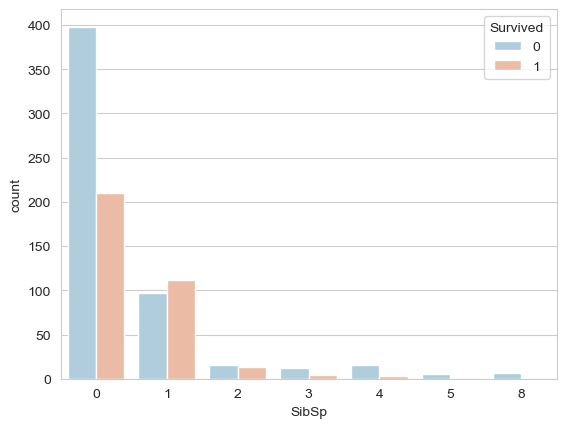

In [142]:
#Showing Distribution SibSp of  Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'],palette='RdBu_r')
plt.show()

Distribution is more at alone passengers

<Axes: xlabel='Parch', ylabel='count'>

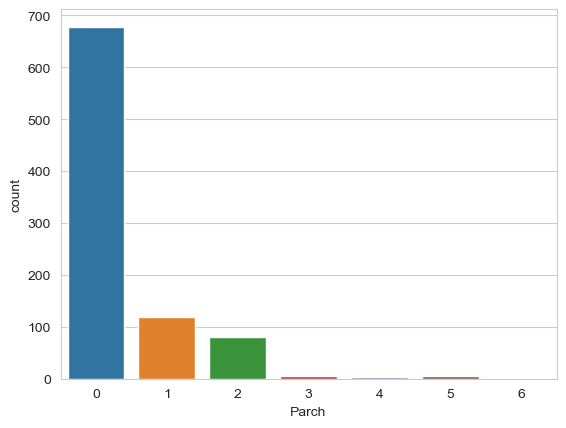

In [143]:
#plotting the Parch for better understanding
sns.countplot(x='Parch',data=titanic)

More passengers with zero parent/child followed by 1 parent/child

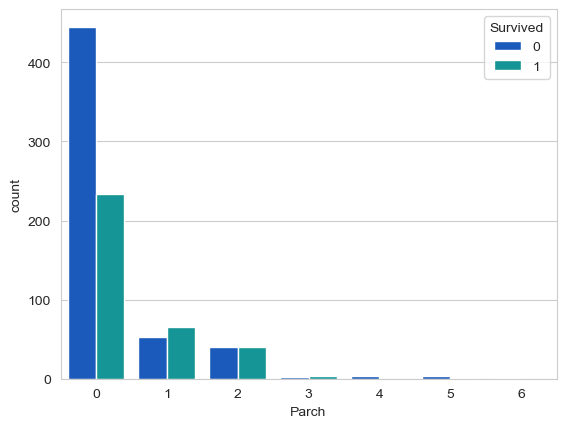

In [144]:
#Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'],palette='winter')
plt.show()

Distribution is more at alone passengers

Since distribution is more at alone passengers we can extract a new feature from Parch and Sibsp

<Axes: xlabel='Embarked', ylabel='count'>

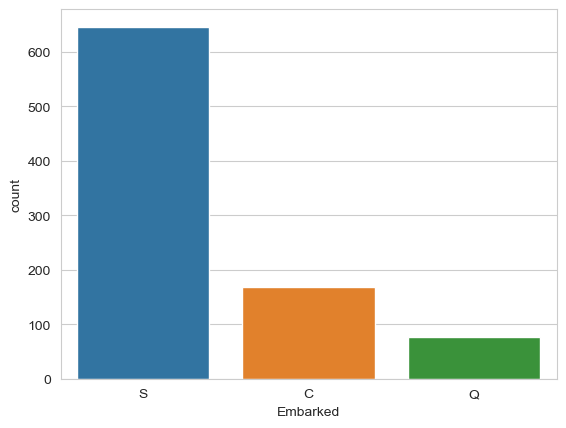

In [145]:
#plotting the Embarked for better understanding
sns.countplot(x='Embarked',data=titanic)

More Passengers embarked at Southampton

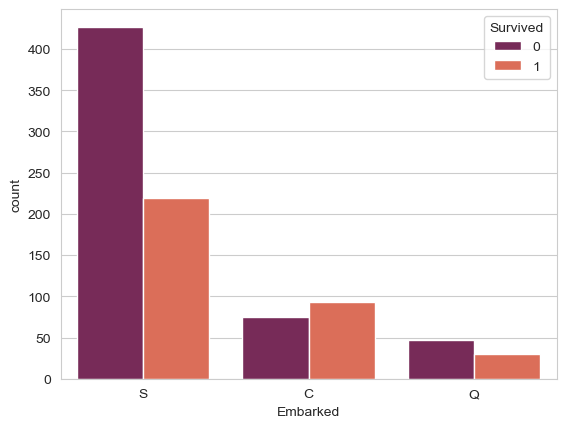

In [146]:
#Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'],palette='rocket')
plt.show()

More survived Distribution embarked at Southampton

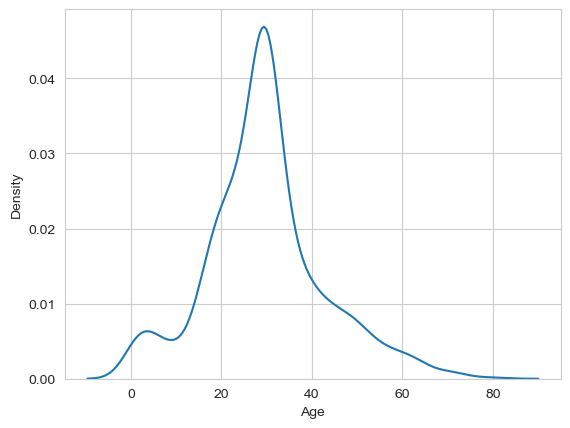

In [147]:
# Age Distribution
sns.kdeplot(x=titanic['Age'])
plt.show()

From this plot it came to know that most of the people lie between 20-40 age group.

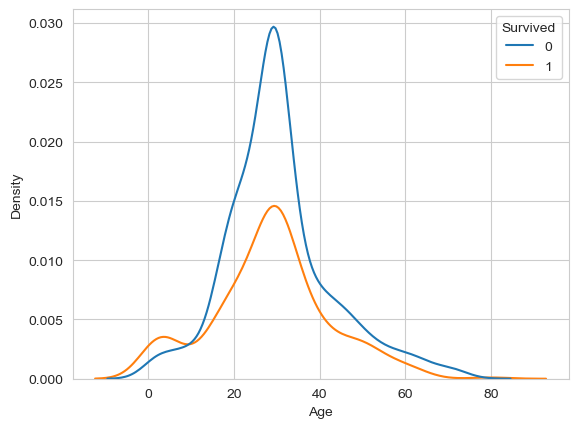

In [148]:
# Showing Distribution of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

This Plot showing most people of age group of 20-40 are died

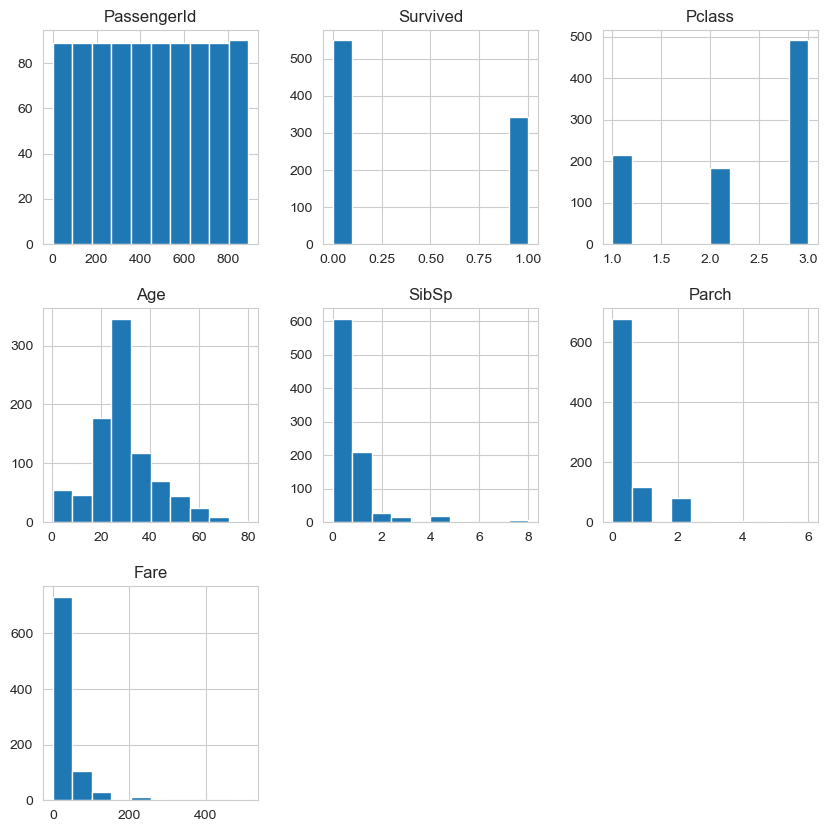

In [149]:
# Plotting Histplot for Dataset
titanic.hist(figsize=(10,10))
plt.show()

In [150]:
#creating a new feature from parch and sibsip
# Create the 'isalone' column
titanic['isalone'] = (titanic['Parch'] + titanic['SibSp']) == 0

# Convert the boolean values to 1 for True and 0 for False
titanic['isalone'] = titanic['isalone'].astype(int)

In [151]:
#dropping parch and sibsp columns after creating new feature from it
titanic.drop(columns=['Parch','SibSp'])

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,isalone
0,1,0,3,male,22.000000,7.2500,S,0
1,2,1,1,female,38.000000,71.2833,C,0
2,3,1,3,female,26.000000,7.9250,S,1
3,4,1,1,female,35.000000,53.1000,S,0
4,5,0,3,male,35.000000,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,S,1
887,888,1,1,female,19.000000,30.0000,S,1
888,889,0,3,female,29.699118,23.4500,S,0
889,890,1,1,male,26.000000,30.0000,C,1


In [152]:
#creating a artificial feature from age and pclass for better performance
titanic['Age*Class'] = titanic.Age * titanic.Pclass

In [153]:
#dropping age and Pclass columns
titanic.drop(columns=['Age','Pclass'])

,PassengerId,Survived,Sex,SibSp,Parch,Fare,Embarked,isalone,Age*Class
0,1,0,male,1,0,7.2500,S,0,66.000000
1,2,1,female,1,0,71.2833,C,0,38.000000
2,3,1,female,0,0,7.9250,S,1,78.000000
3,4,1,female,1,0,53.1000,S,0,35.000000
4,5,0,male,0,0,8.0500,S,1,105.000000
...,...,...,...,...,...,...,...,...,...
886,887,0,male,0,0,13.0000,S,1,54.000000
887,888,1,female,0,0,30.0000,S,1,19.000000
888,889,0,female,1,2,23.4500,S,0,89.097353
889,890,1,male,0,0,30.0000,C,1,26.000000


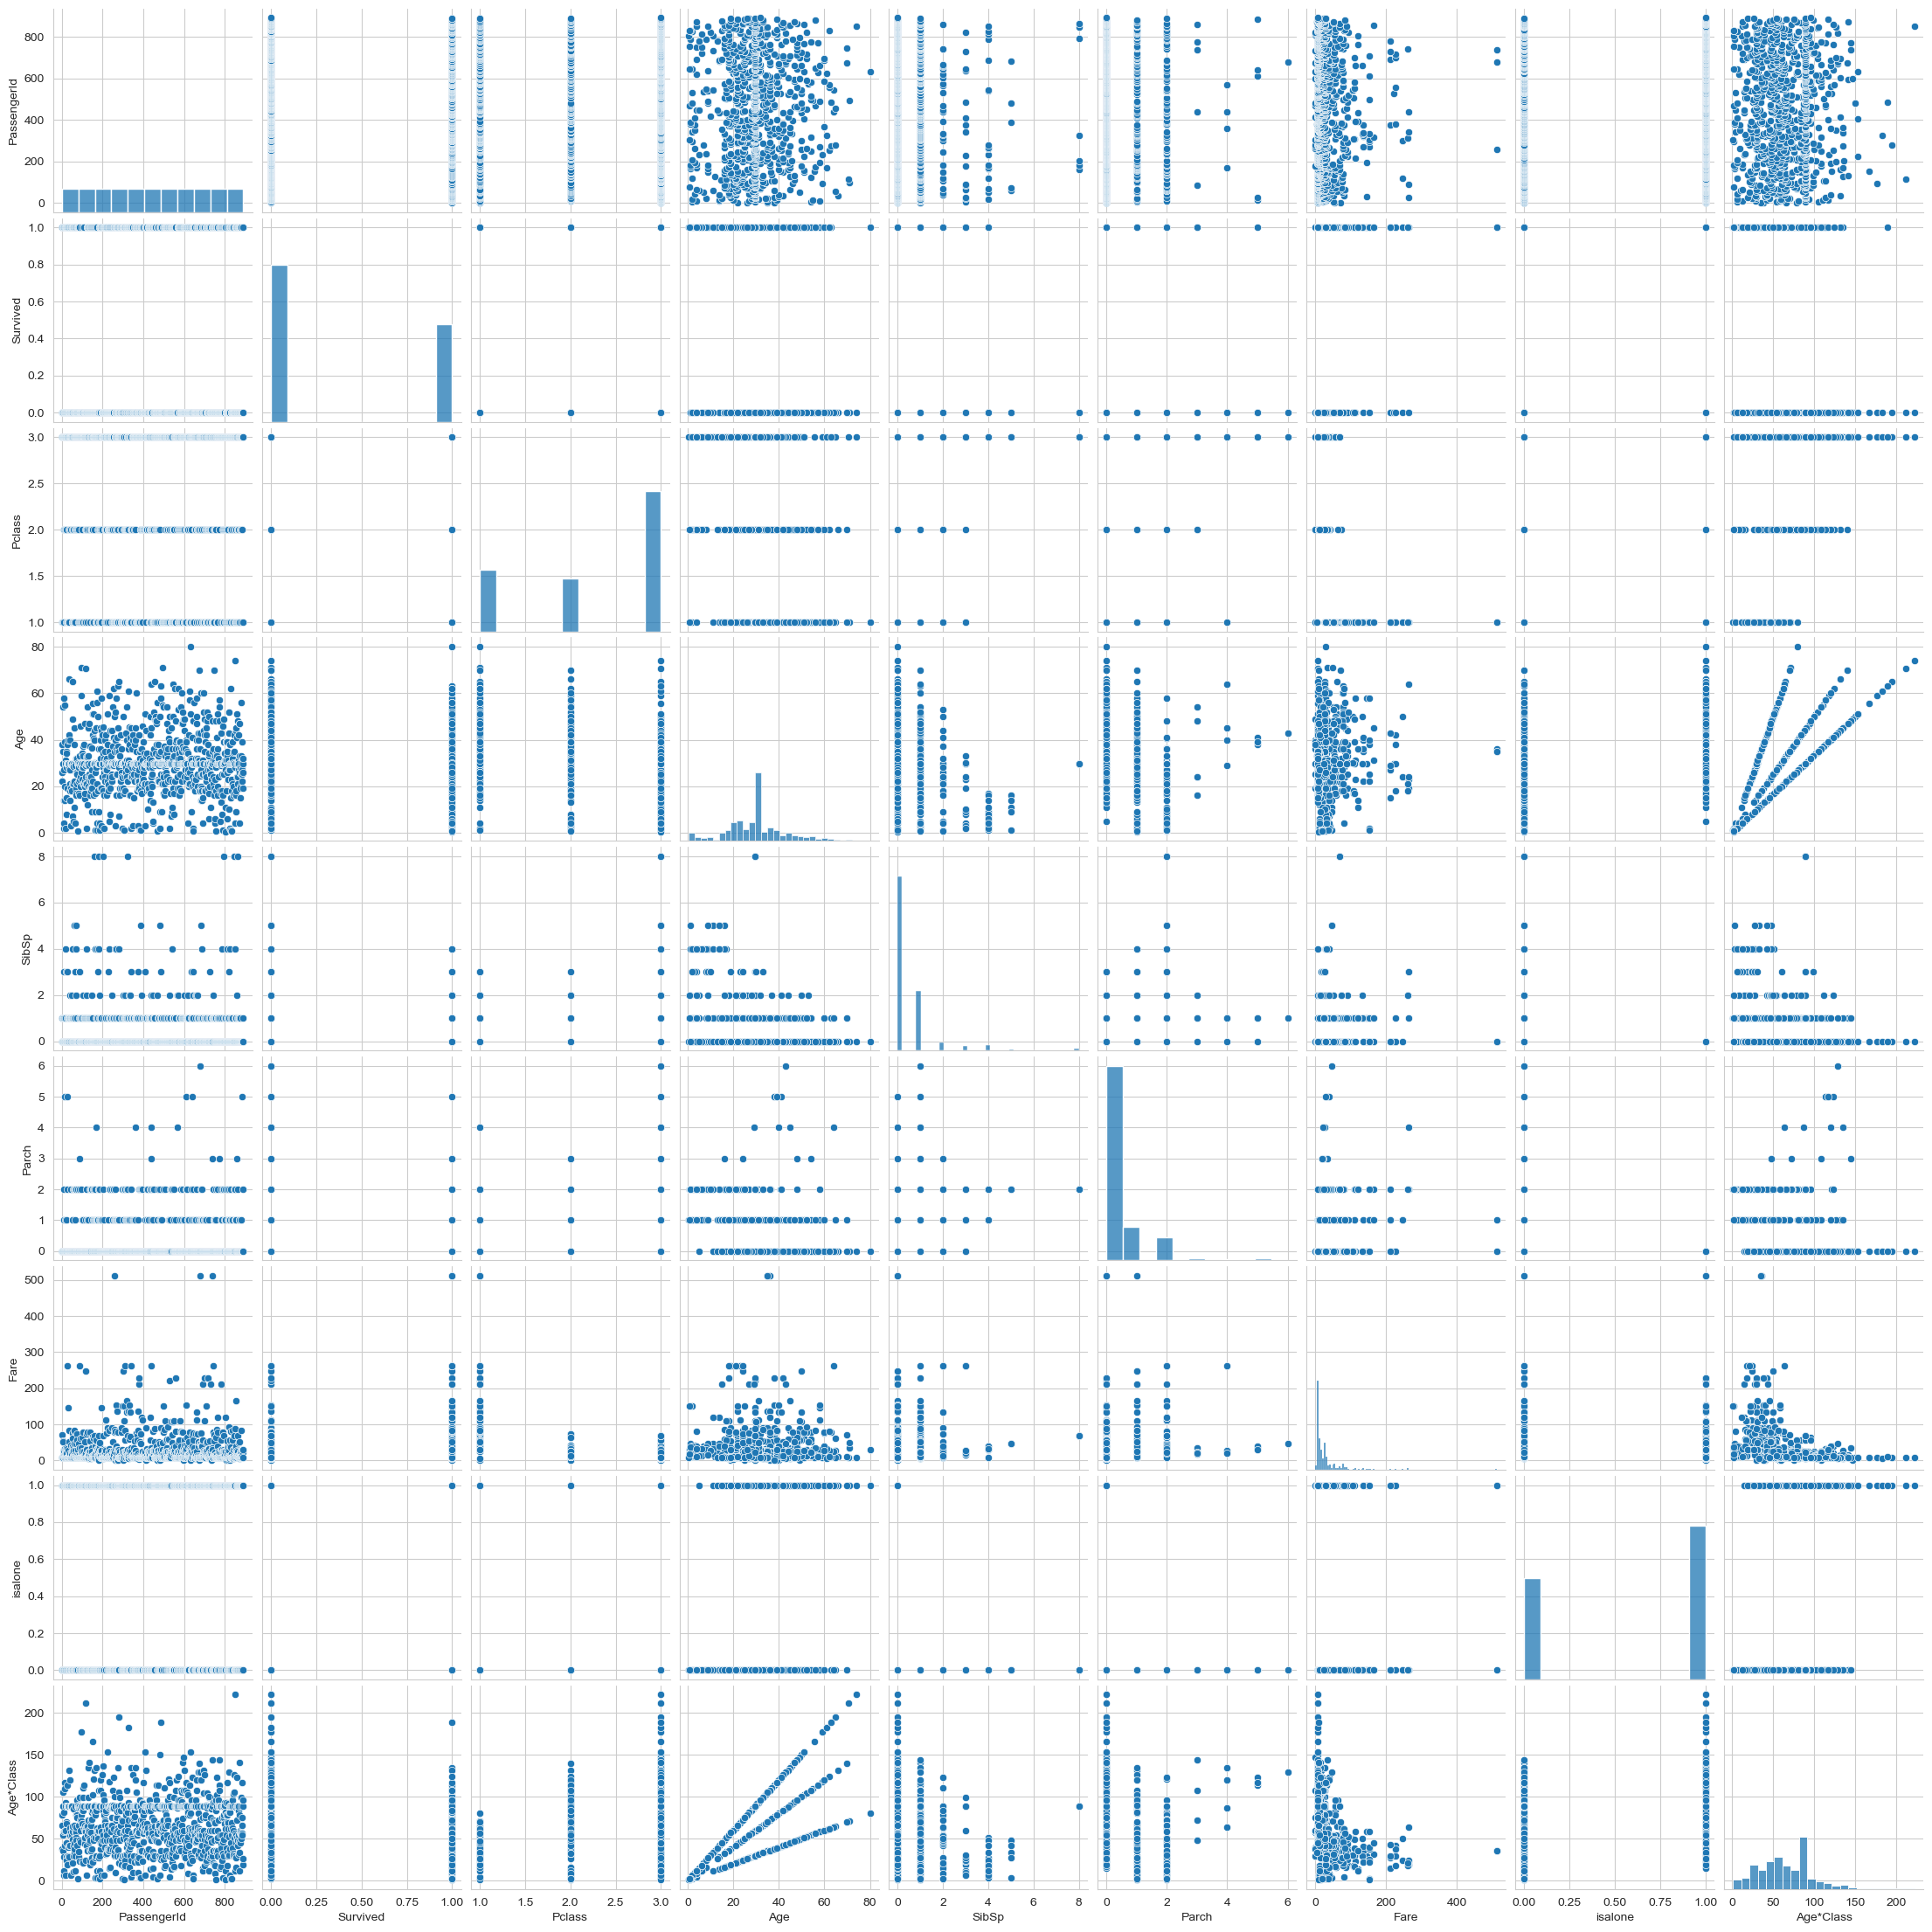

In [154]:
# Plotting pairplot
sns.pairplot(titanic)
plt.show()

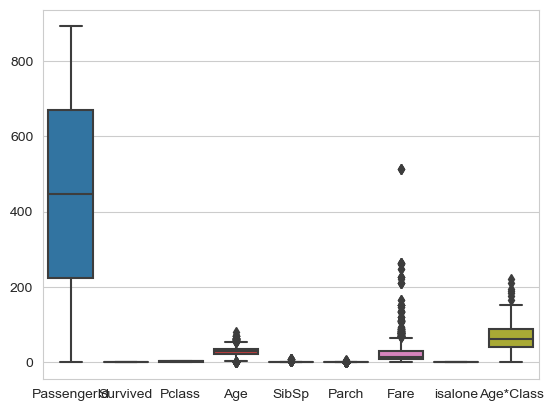

In [155]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic)
plt.show()

# Label Encoding

In [156]:

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isalone,Age*Class
0,1,0,3,1,22.0,1,0,7.2500,2,0,66.0
1,2,1,1,0,38.0,1,0,71.2833,0,0,38.0
2,3,1,3,0,26.0,0,0,7.9250,2,1,78.0
3,4,1,1,0,35.0,1,0,53.1000,2,0,35.0
4,5,0,3,1,35.0,0,0,8.0500,2,1,105.0


# Model Building

In [157]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [158]:
#selecting features for training
X = titanic.drop("Survived", axis=1)
Y= titanic["Survived"]

In [159]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [160]:
#defining functions for scoring of model,confusion matrix,classification report

def model_score(model):
    print('\nTraining Score :',model.score(X_train,Y_train)) 
    print('\nTesting Score  :',model.score(X_test,Y_test))     
    
def model_eval(ytest,ypred):
    c_m = confusion_matrix(ytest,ypred)
    c_r = classification_report(ytest,ypred)
    print('\nConfusion Matrix\n',c_m)
    print('\nClassification Report\n',c_r)

# 1.Logistic Regression Model

In [161]:
#Building model using Logistic Regression algorithm

LR = LogisticRegression()
LR.fit(X_train,Y_train)

#predicting using Logistic Regression

LR_P=LR.predict(X_test)

#computing model training and testing score
model_score(LR)


Training Score : 0.797752808988764

Testing Score  : 0.7821229050279329


In [162]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,LR_P)

#printing the accuracy score 

LR_ACC = accuracy_score(Y_test,LR_P)
print('Accuracy Score :',LR_ACC)


Confusion Matrix
 [[89 16]
 [23 51]]

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy Score : 0.7821229050279329


# 2.Random Forest Classifier Model

In [163]:
#Building model using Random Forest Classifier algorithm

RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

#predicting using Random Forest Classifier

RF_P=RF.predict(X_test)

#computing model training and testing score
model_score(RF)


Training Score : 1.0

Testing Score  : 0.8603351955307262


In [164]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,RF_P)

#printing the accuracy score 

RF_ACC = accuracy_score(Y_test,RF_P)
print('Accuracy Score :',RF_ACC)


Confusion Matrix
 [[96  9]
 [16 58]]

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       105
           1       0.87      0.78      0.82        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179

Accuracy Score : 0.8603351955307262


# 3.K Neighbors Classifier Model

In [165]:
#Building model using K Neighbors Classifier algorithm

KN = KNeighborsClassifier()
KN.fit(X_train,Y_train)

#predicting using K Neighbors Classifier

KN_P=KN.predict(X_test)

#computing model training and testing score
model_score(KN)


Training Score : 0.7415730337078652

Testing Score  : 0.664804469273743


In [166]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,KN_P)

#printing the accuracy score 

KN_ACC = accuracy_score(Y_test,KN_P)
print('Accuracy Score :',KN_ACC)


Confusion Matrix
 [[86 19]
 [41 33]]

Classification Report
               precision    recall  f1-score   support

           0       0.68      0.82      0.74       105
           1       0.63      0.45      0.52        74

    accuracy                           0.66       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.66      0.66      0.65       179

Accuracy Score : 0.664804469273743


# 4. Gradient Boosting Classifier Model

In [167]:
#Building model using Gradient Boosting Classifier algorithm

GB=GradientBoostingClassifier()
GB.fit(X_train,Y_train)

#predicting using Gradient Boosting Classifier

GB_P=GB.predict(X_test)

#computing model training and testing score
model_score(GB)


Training Score : 0.898876404494382

Testing Score  : 0.8324022346368715


In [168]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,GB_P)

#printing the accuracy score 

GB_ACC = accuracy_score(Y_test,GB_P)
print('Accuracy Score :',GB_ACC)


Confusion Matrix
 [[96  9]
 [21 53]]

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy Score : 0.8324022346368715


# 5.DecisionTreeClassifier Model

In [169]:
#Building model using Decision Tree Classifier algorithm

DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)

#predicting using Decision Tree Classifier

DT_P=DT.predict(X_test)

#computing model training and testing score
model_score(DT)


Training Score : 1.0

Testing Score  : 0.7597765363128491


In [170]:
# Evaluating using confusion matrix ,classification report,accuracy score

model_eval(Y_test,DT_P)

#printing the accuracy score 

DT_ACC = accuracy_score(Y_test,DT_P)
print('Accuracy Score :',DT_ACC)


Confusion Matrix
 [[86 19]
 [24 50]]

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       105
           1       0.72      0.68      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

Accuracy Score : 0.7597765363128491


In [171]:
#Evaluating accuracy scores of all the models

ACC={'MODEL':['Logistic Regression','Random Forest','K Neighbors','Gradient Boosting','Decision Tree'],'ACC_SCORES':[LR_ACC,RF_ACC,KN_ACC,GB_ACC,DT_ACC]}

#creating a dataframe of accuracy scores

ACC_D=pd.DataFrame(data=ACC,index=[1,2,3,4,5])

#printing the dataframe

print("\nDataFrame of Accuracy Scores:")
display(ACC_D)


DataFrame of Accuracy Scores:


,MODEL,ACC_SCORES
1,Logistic Regression,0.782123
2,Random Forest,0.860335
3,K Neighbors,0.664804
4,Gradient Boosting,0.832402
5,Decision Tree,0.759777


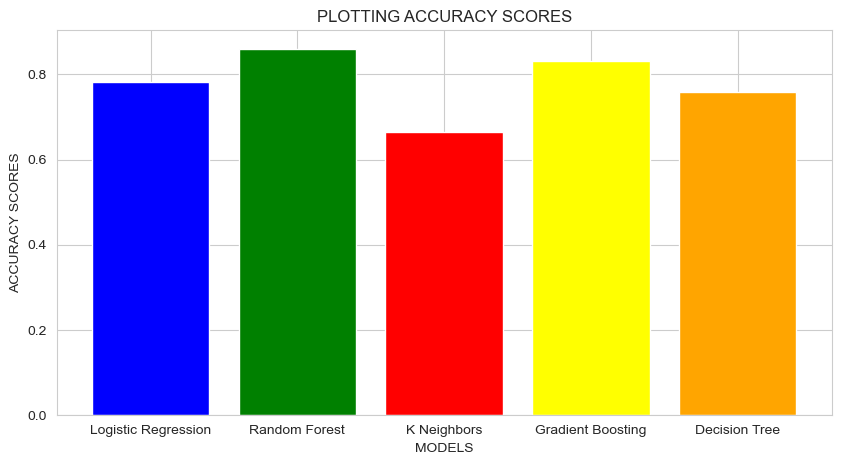

In [173]:
#plotting accuracy scores using matplotlib

plt.figure(figsize=(10,5))
colors = ["blue", "green", "red", "yellow","orange","purple"]
plt.bar(ACC_D['MODEL'],ACC_D['ACC_SCORES'],color=colors)
plt.title('PLOTTING ACCURACY SCORES')
plt.xlabel('MODELS')
plt.ylabel('ACCURACY SCORES')
plt.show()

Random Forest Model got the Highest Accuracy

In [174]:
#creating a dataframe that contains final predicted values with passengerid and survived columns
predicted_data= pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": RF_P
    })
predicted_data

,PassengerId,Survived
709,710,0
439,440,0
840,841,0
720,721,1
39,40,0
...,...,...
433,434,0
773,774,0
25,26,0
84,85,1


In [175]:
#Finally,creating a csv file of dataframe containing passengerid and survived columns
predicted_data.to_csv("Predicted-data.csv")

                                             Thank You!!!